In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [6]:
from functools import reduce
def mm_ss2seconds(mm_ss):
    return reduce(lambda acc, x: acc*60 + x, map(int, mm_ss.split(':')))

In [64]:
# Load in all the results
b0 = pd.read_csv("../../results/b0.csv", index_col=['epoch'],converters={'time': mm_ss2seconds}) 
b0.name = 'B0'
b0_v2 = pd.read_csv("../../results/b0_v2.csv", index_col=['epoch'],converters={'time': mm_ss2seconds})
b0_v2.name = 'B0'
b1 = pd.read_csv("../../results/efficientnet-b1.csv", index_col=['epoch'],converters={'time': mm_ss2seconds})
b1.name = 'B1'
b2 = pd.read_csv("../../results/b2_40.csv", index_col=['epoch'],converters={'time': mm_ss2seconds})
b2.name = 'B2'
b2_v2 = pd.read_csv("../../results/efficientnet-b2.csv", index_col=['epoch'],converters={'time': mm_ss2seconds})
b2_v2.name = 'B2'
b3 = pd.read_csv("../../results/b3.csv", index_col=['epoch'],converters={'time': mm_ss2seconds})
b3.name = 'B3'
b3_v2 = pd.read_csv("../../results/efficientnet-b3_v2.csv", index_col=['epoch'],converters={'time': mm_ss2seconds})
b3_v2.name = 'B3'
resnet18 =  pd.read_csv("../../results/ResNet18.csv", index_col=['epoch'],converters={'time': mm_ss2seconds})
resnet18.name = 'ResNet-18'
mobnet_ranger = pd.read_csv("../../results/history_mobilenet_ranger.csv", index_col=['epoch'],converters={'time': mm_ss2seconds})
mobnet_ranger.name = 'MobileNet-Ranger'
mobnet = pd.read_csv("../../results/history_mobilenet_rmsprop.csv", index_col=['epoch'],converters={'time': mm_ss2seconds})
mobnet.name = 'MobileNet'
dfs = [b0, b0_v2, b1, b2, b2_v2, b3, b3_v2, resnet18, mobnet_ranger, mobnet]


In [65]:
# Find Max values for all dataframes
max_dict = {}
dict_names = {}
for df in dfs:
    print("Finding max of",df.name)
    for col in df.columns:
        if col in max_dict:
            max_val = df[col].max()
            if max_dict[col] < max_val:
                max_dict[col] = max_val
                dict_names[col] = df.name

        else:
            max_val = df[col].max()
            max_dict[col] = max_val
            dict_names[col] = df.name

Finding max of B0
Finding max of B0
Finding max of B1
Finding max of B2
Finding max of B2
Finding max of B3
Finding max of B3
Finding max of ResNet-18
Finding max of MobileNet-Ranger
Finding max of MobileNet


In [66]:
# Printing the maximum values and the dataframe that holds then
for k in max_dict.keys():
    print(k, max_dict[k], dict_names[k])

train_loss 3.61289 ResNet-18
valid_loss 3.594336 ResNet-18
accuracy 0.800582 B3
f_beta 0.7749199999999999 B3
time 3401 B3
kappa_score 0.759613 B3
top_k_accuracy 0.941212 B3
precision 0.7749199999999999 B3
recall 0.7749199999999999 B3


In [67]:
# Find the shortest training time to use as the x_axis 
x = min([b0.index[-1],b0_v2.index[-1],b1.index[-1],b2.index[-1],b2_v2.index[-1],b3.index[-1],b3_v2.index[-1],resnet18.index[-1],mobnet_ranger.index[-1],mobnet.index[-1]])
x

19

In [68]:
# Find the columns that all results have
cols_to_use = min(len(b0.columns), len(b2.columns), len(b3.columns))
b0.columns[:cols_to_use]

Index(['train_loss', 'valid_loss', 'accuracy', 'f_beta', 'time'], dtype='object')

In [69]:
nice_column_names = ["Training Loss", "Validation Loss", "Accuracy", "F1 Score", "Time Taken"]

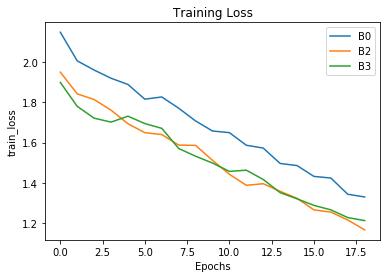

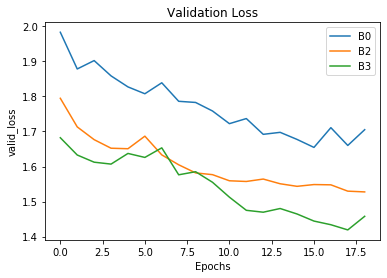

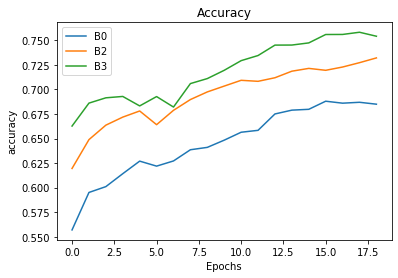

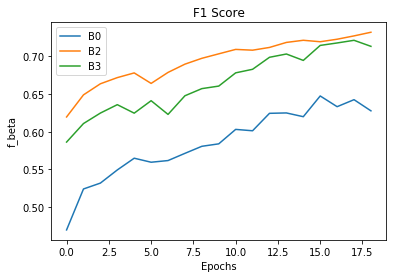

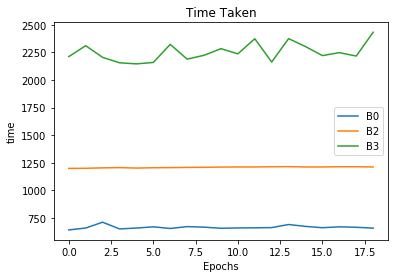

In [70]:
# Make ALL the graphs
for i in range(cols_to_use):
    column = b0.columns[i]
    plt.plot(np.arange(x), b0[column][:x], label="B0")
    plt.plot(np.arange(x), b2[column][:x], label="B2")
    plt.plot(np.arange(x), b3[column][:x], label="B3")
    plt.ylabel(column)
    plt.xlabel("Epochs")
    plt.legend()
    plt.title(nice_column_names[i])
    plt.show()

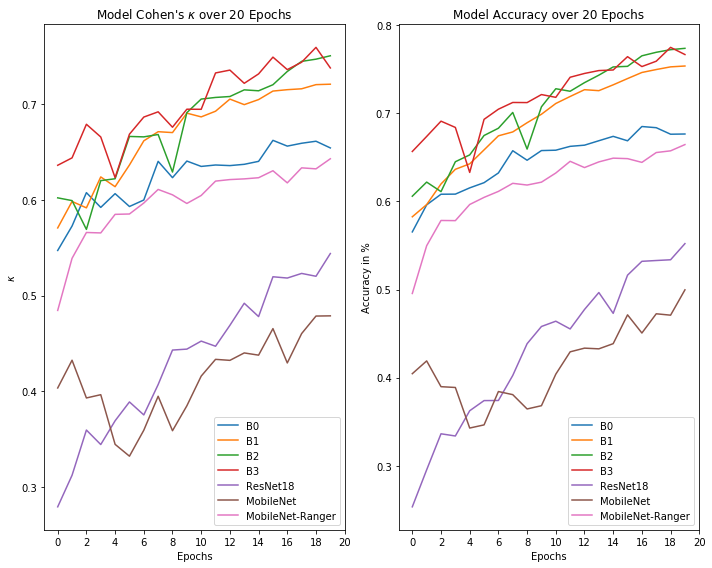

In [71]:
# Accuracy and Cohen's Kappa
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
column = "kappa_score"
x_len=20
plt.plot(np.arange(x_len), b0_v2[column][:x_len], label="B0")
plt.plot(np.arange(x_len), b1[column][:x_len], label="B1")
plt.plot(np.arange(x_len), b2_v2[column][:x_len], label="B2")
plt.plot(np.arange(x_len), b3_v2[column][:x_len], label="B3")
plt.plot(np.arange(x_len), resnet18[column][:x_len], label="ResNet18")
plt.plot(np.arange(x_len), mobnet[column][:x_len], label="MobileNet")
plt.plot(np.arange(x_len), mobnet_ranger[column][:x_len], label="MobileNet-Ranger")
plt.ylabel("$\kappa$")
plt.xlabel("Epochs")
plt.legend()
plt.xticks(np.arange(0,x_len+1,2))
plt.title("Model Cohen's $\kappa$ over 20 Epochs")
# Honing in on Graphs we want
plt.subplot(1,2,2)
column = "accuracy"
x_len=20
plt.plot(np.arange(x_len), b0_v2[column][:x_len], label="B0")
plt.plot(np.arange(x_len), b1[column][:x_len], label="B1")
plt.plot(np.arange(x_len), b2_v2[column][:x_len], label="B2")
plt.plot(np.arange(x_len), b3_v2[column][:x_len], label="B3")
plt.plot(np.arange(x_len), resnet18[column][:x_len], label="ResNet18")
plt.plot(np.arange(x_len), mobnet[column][:x_len], label="MobileNet")
plt.plot(np.arange(x_len), mobnet_ranger[column][:x_len], label="MobileNet-Ranger")
plt.ylabel("Accuracy in %")
plt.xlabel("Epochs")
plt.legend()
plt.xticks(np.arange(0,x_len+1,2))
plt.title("Model Accuracy over 20 Epochs")
plt.tight_layout()
plt.savefig("acc_and_kappa.png")
plt.show()

In [72]:
# Time over 20 Epochs
x_len = 20
b0_avg_time = resnet18.time[:x_len].mean()
b1_avg_time = mobnet.time[:x_len].mean()
b2_avg_time = mobnet_ranger.time[:x_len].mean()
b3_avg_time = b3.time[:x_len].mean()
print(b0_avg_time/60, b1_avg_time/60, b2_avg_time/60)

22.720000000000002 7.4625 7.345833333333333


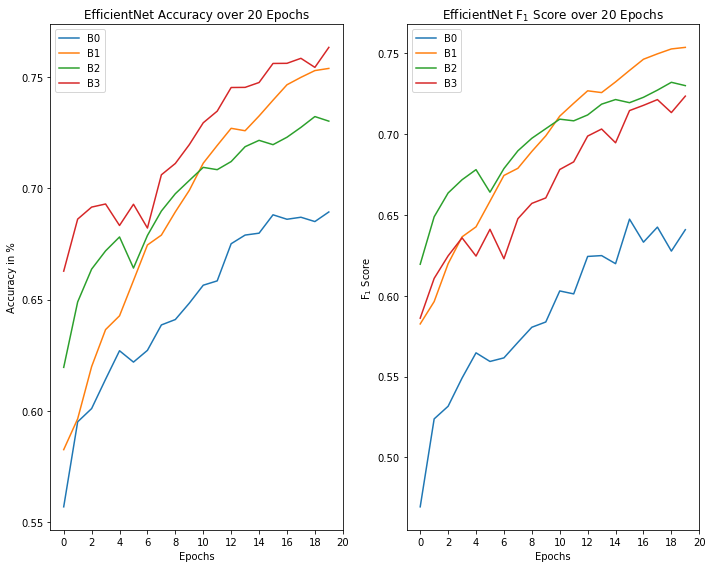

In [73]:
# F1 Score
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
column = "accuracy"
x_len=20
plt.plot(np.arange(x_len), b0[column][:x_len], label="B0")
plt.plot(np.arange(x_len), b1[column][:x_len], label="B1")
plt.plot(np.arange(x_len), b2[column][:x_len], label="B2")
plt.plot(np.arange(x_len), b3[column][:x_len], label="B3")
plt.ylabel("Accuracy in %")
plt.xlabel("Epochs")
plt.legend()
plt.xticks(np.arange(0,x_len+1,2))
plt.title("EfficientNet Accuracy over 20 Epochs")
plt.subplot(1,2,2)
column = "f_beta"
x_len=20
plt.plot(np.arange(x_len), b0[column][:x_len], label="B0")
plt.plot(np.arange(x_len), b1[column][:x_len], label="B1")
plt.plot(np.arange(x_len), b2[column][:x_len], label="B2")
plt.plot(np.arange(x_len), b3[column][:x_len], label="B3")
plt.ylabel("F$_1$ Score")
plt.xlabel("Epochs")
plt.legend()
plt.title("EfficientNet F$_1$ Score over 20 Epochs")
plt.xticks(np.arange(0,x_len+1,2))
plt.tight_layout()
plt.savefig("acc_and_f1.png")
plt.show()

In [16]:
# Other useful information
x_len = 20
b0_avg_time = b0.time[:x_len].mean()
b1_avg_time = b1.time[:x_len].mean()
b2_avg_time = b2.time[:x_len].mean()
b3_avg_time = b3.time[:x_len].mean()
print(b0_avg_time/60, b1_avg_time/60, b2_avg_time/60, b3_avg_time/60)

11.063333333333333 23.0475 20.13 37.5275


In [40]:
# Precision Recall Curves
precision = b2['precision']
recall    = b2['recall']

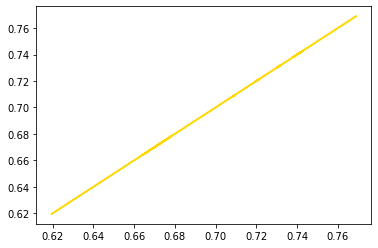

In [41]:
plt.plot(recall, precision, color='gold', lw=2)

In [ ]:
# Confusion Matrix
learn = 
interp = ClassificationInterpretation.from_learner(learn)